In [1]:
from config_simulation import (
    simulation_linear_regression,
    simulation_logistic_regression,
    simulation_geometric_median,
    simulation_spherical_distribution,
    simulation_p_means,
    eval_covtype,
    n,
    N,
    nu_list,
    gamma_list,
)
from optimization_algorithms import USNA


optimizer_class = USNA
optimizer_list = [
    optimizer_class(gamma=gamma, generate_Z="canonic deterministic")
    for gamma in gamma_list
]

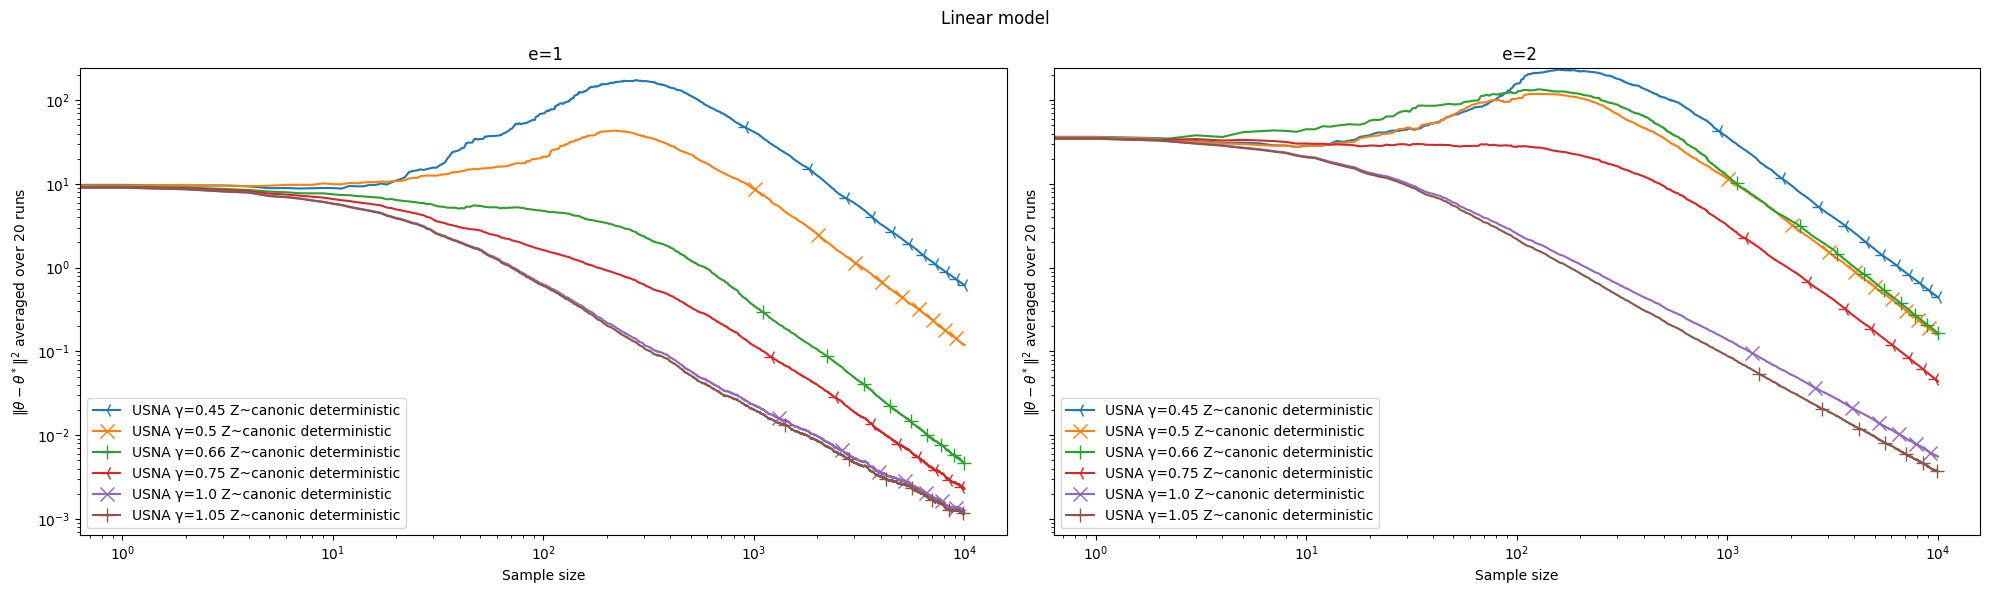

In [2]:
simulation = simulation_linear_regression(optimizer_list=optimizer_list)
simulation.run_multiple_datasets(N=N, n=n)

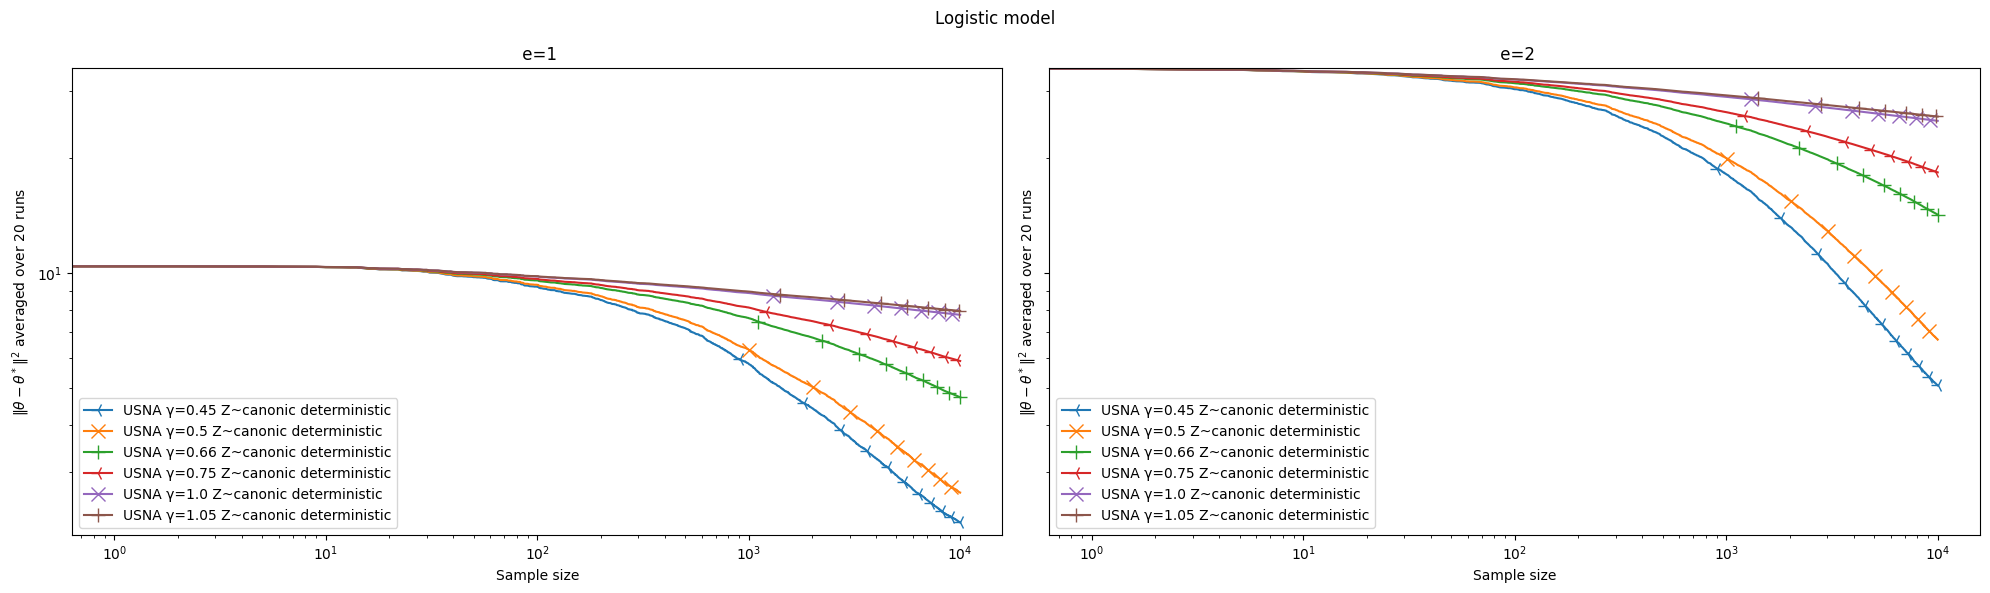

In [3]:
simulation = simulation_logistic_regression(optimizer_list=optimizer_list)
simulation.run_multiple_datasets(N=N, n=n)

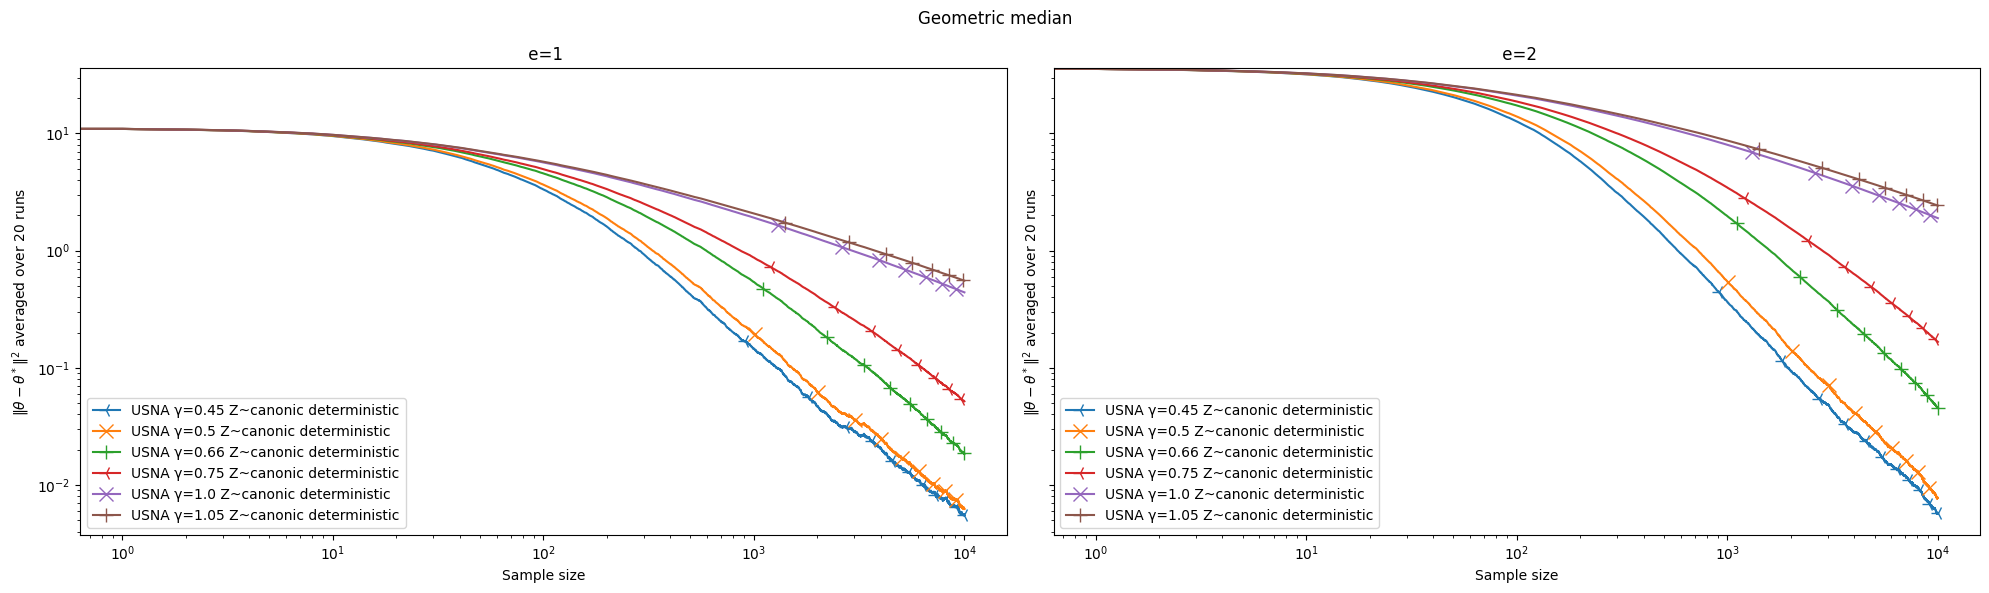

In [4]:
simulation = simulation_geometric_median(optimizer_list=optimizer_list)
simulation.run_multiple_datasets(N=N, n=n)

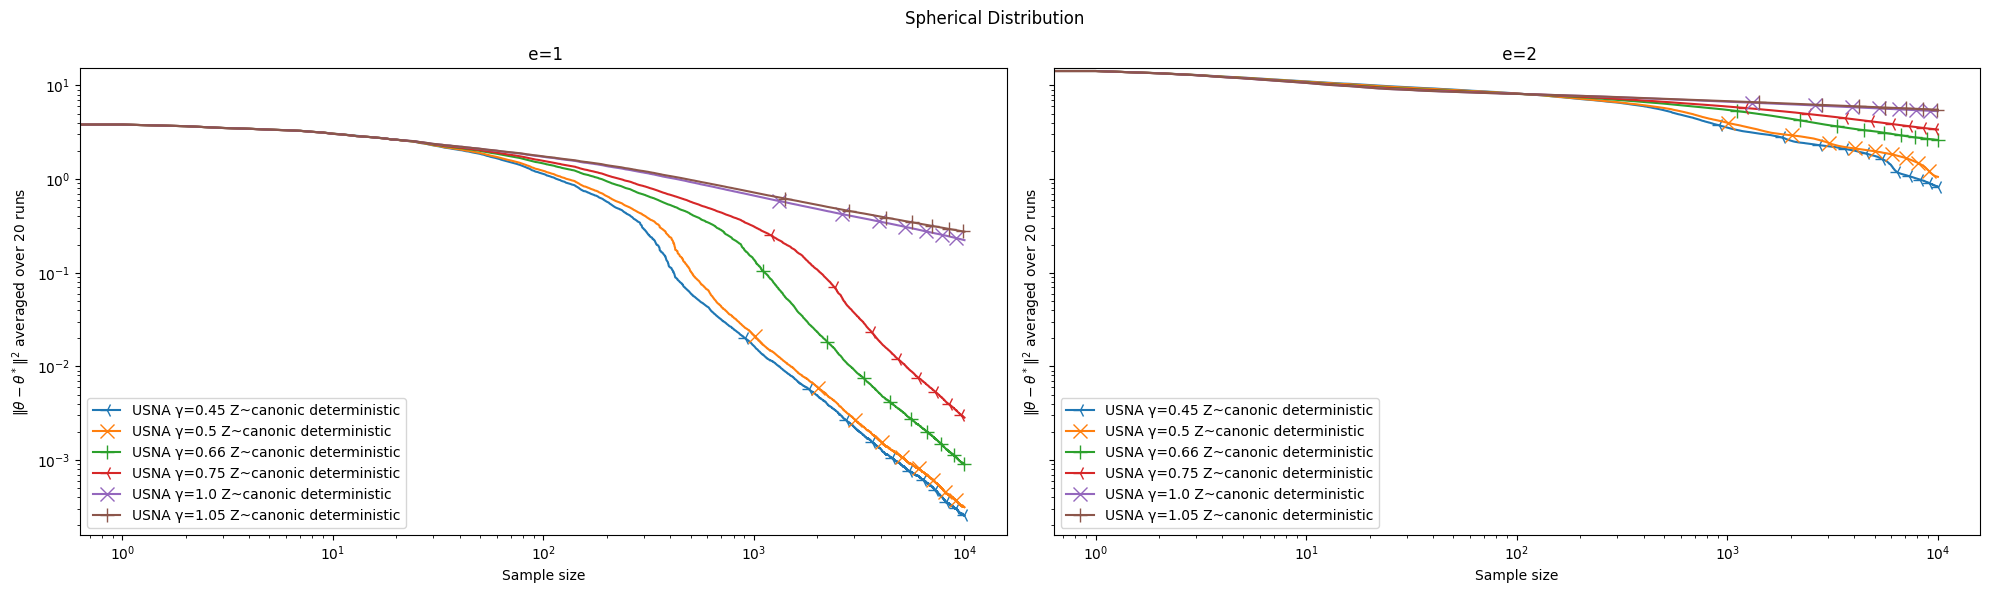

In [5]:
simulation = simulation_spherical_distribution(optimizer_list=optimizer_list)
simulation.run_multiple_datasets(N=N, n=n)

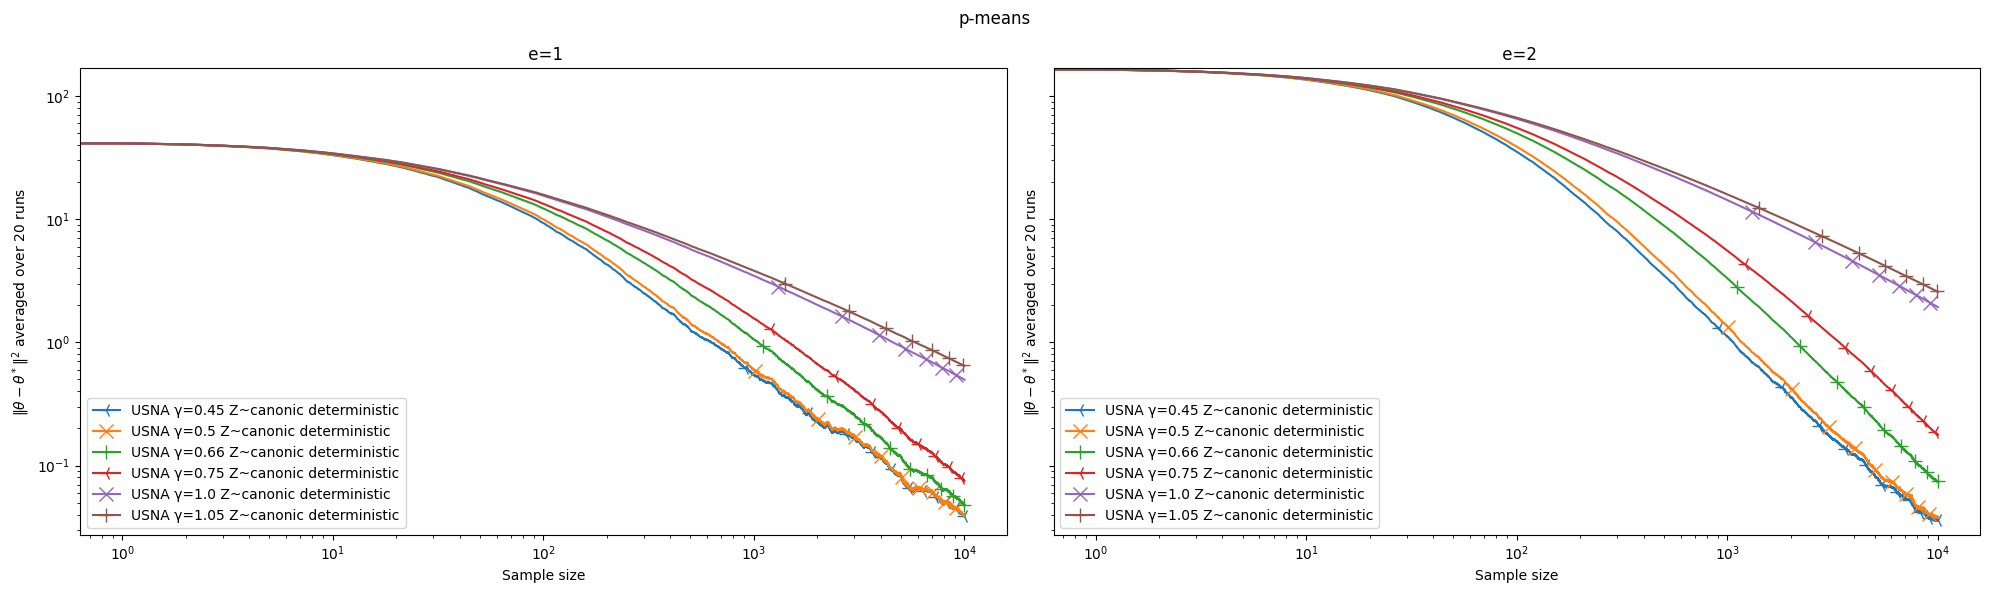

In [6]:
simulation = simulation_p_means(optimizer_list=optimizer_list)
simulation.run_multiple_datasets(N=N, n=n)

In [7]:
eval = eval_covtype(optimizer_list=optimizer_list)
_, _ = eval.run()

Optimizers:   0%|          | 0/6 [00:00<?, ?it/s]

Data:   0%|          | 0/464809 [00:00<?, ?it/s]

,USNA γ=0.45 Z~canonic deterministic,USNA γ=0.5 Z~canonic deterministic,USNA γ=0.66 Z~canonic deterministic,USNA γ=0.75 Z~canonic deterministic,USNA γ=1.0 Z~canonic deterministic,USNA γ=1.05 Z~canonic deterministic
Training Accuracy,46.390000,64.210000,36.420000,57.910000,43.300000,63.580000
Test Accuracy,46.470000,64.420000,36.620000,57.590000,43.520000,63.380000
